In [1]:
import os
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

import pickle

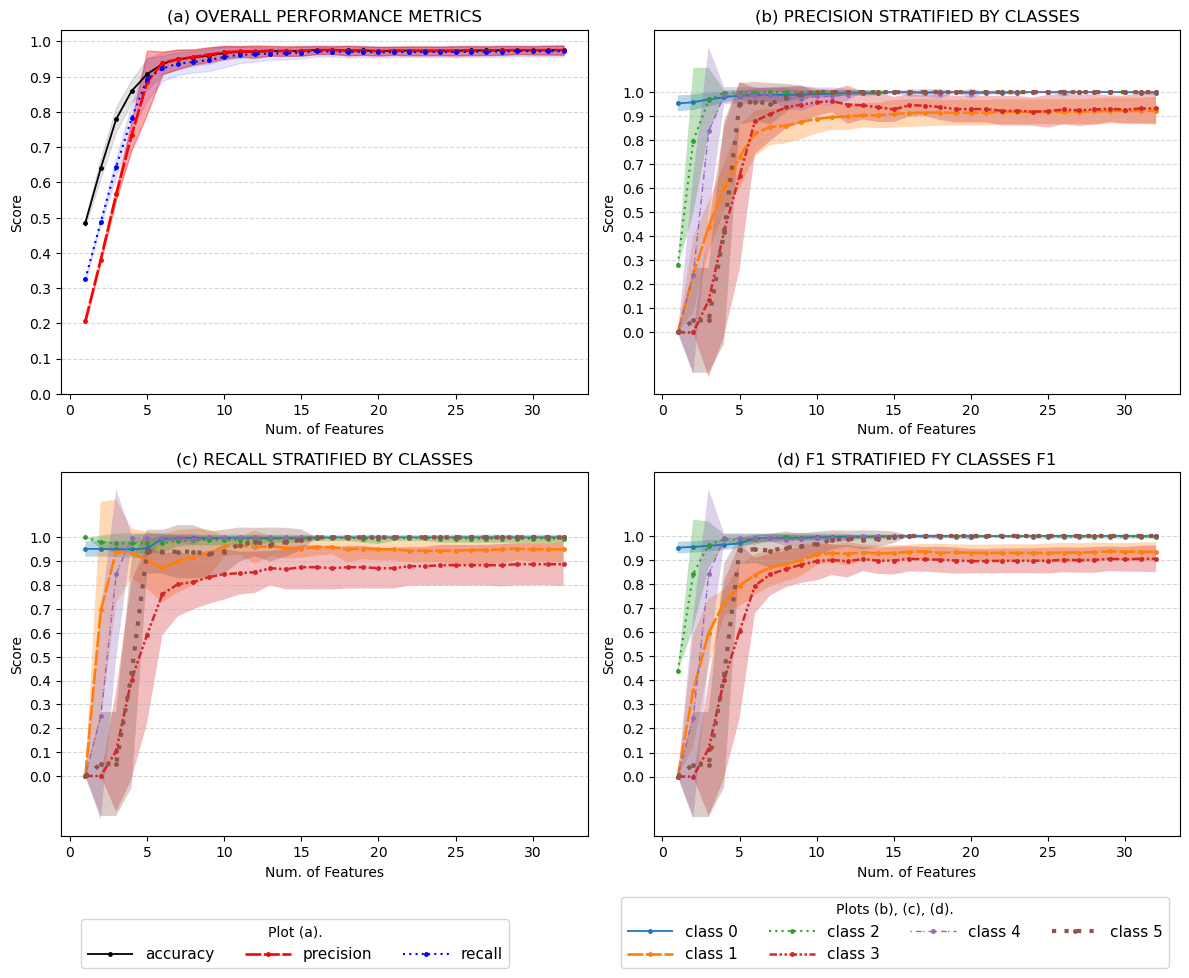

<Figure size 640x480 with 0 Axes>

In [15]:

sample = "33"

with open(r'../DATA/RFE_CLASSICAL_both_' + sample + '.pickle', 'rb') as f:
    OUT = pickle.load(f)
    
data_mean = {}
data_std = {}
list_of_classical_names = ['accuracy', 'precision', 'recall', 
                            'f1_micro', 'f1_macro', 'f1_weighted',
                            'per_class']

for i in range(0, len( list_of_classical_names)):
    data_mean[list_of_classical_names[i]] = []

for i in range(0, len( list_of_classical_names)):
    data_std[list_of_classical_names[i]] = []


list_of_per_class_keys = ["precision", "recall", "f1-score"]
list_of_per_class_dicc = []
for i in range(len(OUT[0]['per_class'][0])):
    
    data_mean_per_class = {}
    for j in range(0, len(list_of_per_class_keys)):
        
        data_mean_per_class[list_of_per_class_keys[j]] = []

    list_of_per_class_dicc.append(data_mean_per_class)


list_of_per_class_dicc_std = []
for i in range(len(OUT[0]['per_class'][0])):
    
    data_std_per_class = {}
    for j in range(0, len(list_of_per_class_keys)):
        
        data_std_per_class[list_of_per_class_keys[j]] = []

    list_of_per_class_dicc_std.append(data_std_per_class)


           
for t in range(len(OUT[0]['accuracy'])):
    
    for key in list_of_classical_names:

        if key != 'per_class':

            score = []
            for seed in range(len(OUT)):
                score.append(OUT[seed][key][t])

            data_mean[key] += [np.mean(np.array(score))]
            data_std[key] += [np.std(np.array(score))]

        else:
            continue


key = 'per_class'    
for t in range(len(OUT[0]['accuracy'])):
    
    i = 0
    for dicc_mean, dicc_std in zip(list_of_per_class_dicc, list_of_per_class_dicc_std):

        j = 0
        for subkey in list_of_per_class_keys:

            score = [] 
            for seed in range(len(OUT)):
                
                score.append(OUT[seed][key][t][i][j])

            dicc_mean[subkey] += [np.mean(np.array(score))]
            dicc_std[subkey] += [np.std(np.array(score))]
            
            j = j + 1

        i = i + 1
    
    
x = [*range(1 , len(OUT[0]['accuracy']) + 1)]



not_label = ['f1_micro', 'f1_macro', 'f1_weighted','per_class']


list_of_colors = ["black", "red", "blue",  "green", "yellow", "orange", "purple", "pink" ]
list_of_styles = ['-','--', '-.', ":",'-','--', '-.', ":"]
list_of_dots = ["*", "+", "*", "*", "+", "+", "*"]
list_of_w = [1.3, 1.9, 1.5, 1.8, 1,3, 2.1, 1.7, 2.1]
list_of_dashes = [(1,0), (6,1), (1,2), (3,1,1,1,1,1), (1,3,4,1), (1,0,0,2), (1,1,2,1,1), (3,1,1,3)]
list_of_intensities = [0.10 , 0.350 , 0.10 , 0.55 , 0.19, 0.10 , 0.350 , 0.10 , 0.55 , 0.19]


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 9))

i = 0
for key in list_of_classical_names:
    
    if key not in not_label:

        y_mean = data_mean[key]
        y_mean.reverse()
        y_std = data_std[key]
        y_std.reverse()

        ax1.plot(x, y_mean, label = key, dashes=list_of_dashes[i],
                markersize=2.5, marker='o', color = list_of_colors[i], 
                linestyle='-', linewidth=list_of_w[i])
        
        ax1.fill_between(x, np.array(y_mean) + np.array(y_std),
                        np.array(y_mean) - np.array(y_std), color= list_of_colors[i],
                        alpha=list_of_intensities[i])
        i = i + 1
    else:
        pass

ax1.set_xlabel("Num. of Features")
ax1.set_ylabel("Score")

y_min, y_max = ax1.get_ylim()
y_padding = 0.005 * (y_max - y_min)
ax1.set_ylim(y_min - y_padding, y_max + y_padding)

# Add grid lines
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.set_yticks([(i/10) for i in range(11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1

#ax.legend(loc='upper center', bbox_to_anchor=(1.13, 1.0), ncol=1, fontsize=8)


i = 0   
for dicc_mean, dicc_std in zip(list_of_per_class_dicc, list_of_per_class_dicc_std):
                 
    y_mean = dicc_mean[list_of_per_class_keys[0]]
    y_mean.reverse()
    y_std = dicc_std[list_of_per_class_keys[0]]
    y_std.reverse()

    ax2.plot(x, y_mean, label = "class " + str(i), dashes=list_of_dashes[i],
            markersize=2.5, marker='o', 
            linestyle='-', linewidth=list_of_w[i])
            
        
    ax2.fill_between(x, np.array(y_mean) + np.array(y_std),
                    np.array(y_mean) - np.array(y_std),
                    alpha=0.3)
        
    i = i + 1

ax2.set_xlabel("Num. of Features")
ax2.set_ylabel("Score")

y_min, y_max = ax2.get_ylim()
y_padding = 0.0005 * (y_max - y_min)
ax2.set_ylim(y_min - y_padding, y_max + y_padding)

# Add grid lines
ax2.grid(axis='y', linestyle='--', alpha=0.5)
ax2.set_yticks([(i/10) for i in range(11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1

#ax1.legend(loc='upper center', bbox_to_anchor=(1.13, 1.0), ncol=1, fontsize=8, title ='Class vs all' )



i = 0   
for dicc_mean, dicc_std in zip(list_of_per_class_dicc, list_of_per_class_dicc_std):
                 
    y_mean = dicc_mean[list_of_per_class_keys[1]]
    y_mean.reverse()
    y_std = dicc_std[list_of_per_class_keys[1]]
    y_std.reverse()

    ax3.plot(x, y_mean, label = "class " + str(i), dashes=list_of_dashes[i],
            markersize=2.5, marker='o', 
            linestyle='-', linewidth=list_of_w[i])
            
        
    ax3.fill_between(x, np.array(y_mean) + np.array(y_std),
                    np.array(y_mean) - np.array(y_std),
                    alpha=0.3)
        
    i = i + 1


ax3.set_xlabel("Num. of Features")
ax3.set_ylabel("Score")

y_min, y_max = ax3.get_ylim()
y_padding = 0.0005 * (y_max - y_min)
ax3.set_ylim(y_min - y_padding, y_max + y_padding)

# Add grid lines
ax3.grid(axis='y', linestyle='--', alpha=0.5)
ax3.set_yticks([(i/10) for i in range(11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1


i = 0   
for dicc_mean, dicc_std in zip(list_of_per_class_dicc, list_of_per_class_dicc_std):
                 
    y_mean = dicc_mean[list_of_per_class_keys[2]]
    y_mean.reverse()
    y_std = dicc_std[list_of_per_class_keys[2]]
    y_std.reverse()

    ax4.plot(x, y_mean, label = "class " + str(i),  dashes=list_of_dashes[i],
            markersize=2.5, marker='o', 
            linestyle='-', linewidth=list_of_w[i])
            
        
    ax4.fill_between(x, np.array(y_mean) + np.array(y_std),
                    np.array(y_mean) - np.array(y_std),
                    alpha=0.3)
        
    i = i + 1

ax4.set_xlabel("Num. of Features")
ax4.set_ylabel("Score")

y_min, y_max = ax4.get_ylim()
y_padding = 0.0005 * (y_max - y_min)
ax4.set_ylim(y_min - y_padding, y_max + y_padding)

# Add grid lines
ax4.grid(axis='y', linestyle='--', alpha=0.5)
ax4.set_yticks([(i/10) for i in range(11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1


ax1.set_title('(a) OVERALL PERFORMANCE METRICS')
ax2.set_title('(b) PRECISION STRATIFIED BY CLASSES')
ax3.set_title('(c) RECALL STRATIFIED BY CLASSES')
ax4.set_title('(d) F1 STRATIFIED FY CLASSES F1')


handles, labels = [], []

h, l = ax1.get_legend_handles_labels()
handles += h
labels += l


fig.legend(handles, labels,  title ="Plot (a).",
           loc='lower center', ncol=3, 
           frameon=True, handlelength=3., 
           fontsize=11, bbox_to_anchor=(0.25, -0.09))

handles_, labels_ = [], []

h_, l_ = ax2.get_legend_handles_labels()
handles_ += h_
labels_ += l_

fig.legend(handles_, labels_, title = "Plots (b), (c), (d).",
           loc='lower center', ncol = 4,
           frameon=True, handlelength=3.,
           fontsize=11, bbox_to_anchor=(0.75, -0.09))



plt.tight_layout()

plt.savefig('../plots/both_class_RFE_' + sample + '.pdf' , dpi=300, bbox_inches='tight')
    
plt.show()
plt.clf()